Вариант 5
1. Постройте линейную модель, где в качестве независимых переменных выступают продолжительность, ”танцевальность” и энергичность (вместе со свободным коэффициентом), зависимой – популярность.

2. Проверьте следующие подозрения:
- Чем больше энергичность, тем больше популярность
- Популярность зависит от продолжительности
- Популярность зависит от энергичности и ”танцевальности”

Для проверки гипотез были использованы F и T тесты. Везде за гипотезу H0 принимается условие задачи, а за H1 - обратное ей.

In [ ]:
import pandas as pd
import numpy as np
from scipy import stats
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.optimize as opt
import scipy.stats as stat
from collections import Counter

plt.style.use('ggplot')
%matplotlib inline

In [ ]:
data = pd.read_csv('/content/song_data.csv')
print(data.shape)
data.head()

(18835, 15)


,song_name,song_popularity,song_duration_ms,acousticness,danceability,energy,instrumentalness,key,liveness,loudness,audio_mode,speechiness,tempo,time_signature,audio_valence
0,Boulevard of Broken Dreams,73,262333,0.005520,0.496,0.682,0.000029,8,0.0589,-4.095,1,0.0294,167.060,4,0.474
1,In The End,66,216933,0.010300,0.542,0.853,0.000000,3,0.1080,-6.407,0,0.0498,105.256,4,0.370
2,Seven Nation Army,76,231733,0.008170,0.737,0.463,0.447000,0,0.2550,-7.828,1,0.0792,123.881,4,0.324
3,By The Way,74,216933,0.026400,0.451,0.970,0.003550,0,0.1020,-4.938,1,0.1070,122.444,4,0.198
4,How You Remind Me,56,223826,0.000954,0.447,0.766,0.000000,10,0.1130,-5.065,1,0.0313,172.011,4,0.574


In [ ]:
df = pd.DataFrame(data, columns=['song_popularity', 'danceability', 'energy', 'song_duration_ms'])
df.insert(1, "fict", np.array([1] * df.shape[0]))
df

,song_popularity,fict,danceability,energy,song_duration_ms
0,73,1,0.496,0.682,262333
1,66,1,0.542,0.853,216933
2,76,1,0.737,0.463,231733
3,74,1,0.451,0.970,216933
4,56,1,0.447,0.766,223826
...,...,...,...,...,...
18830,60,1,0.500,0.151,159645
18831,60,1,0.495,0.161,205666
18832,23,1,0.719,0.325,182211
18833,55,1,0.488,0.326,352280


In [ ]:
df.describe()

,song_popularity,fict,danceability,energy,song_duration_ms
count,18835.000000,18835.0,18835.000000,18835.000000,1.883500e+04
mean,52.991877,1.0,0.633348,0.644995,2.182116e+05
std,21.905654,0.0,0.156723,0.214101,5.988754e+04
min,0.000000,1.0,0.000000,0.001070,1.200000e+04
25%,40.000000,1.0,0.533000,0.510000,1.843395e+05
50%,56.000000,1.0,0.645000,0.674000,2.113060e+05
75%,69.000000,1.0,0.748000,0.815000,2.428440e+05
max,100.000000,1.0,0.987000,0.999000,1.799346e+06


In [ ]:
df['song_popularity'].corr(df['danceability'])

0.10429014168024248

In [ ]:
df['song_popularity'].corr(df['energy'])

0.0013650794017007351

In [ ]:
df['song_popularity'].corr(df['song_duration_ms'])

-0.018899406871029253

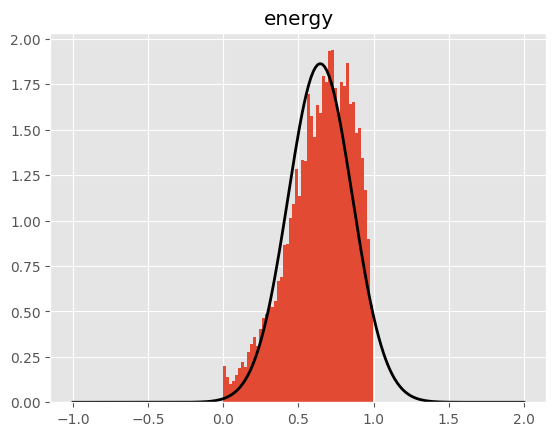

In [ ]:
compe = pd.DataFrame(data, columns=['energy'])
compe.dropna()
compe.hist(bins = 50, density=True)

xs = np.linspace(-1, 2, 200)
ys = stats.norm(loc=compe.mean(), scale = compe.std(ddof=3)).pdf(xs)
plt.plot(xs, ys, color = 'black', lw=2);

((array([-3.96433549, -3.74743334, -3.62871405, ...,  3.62871405,
          3.74743334,  3.96433549]),
  array([0.00107, 0.00107, 0.00163, ..., 0.997  , 0.997  , 0.999  ])),
 (0.21018279521706512, 0.6449947565702151, 0.981528434345227))

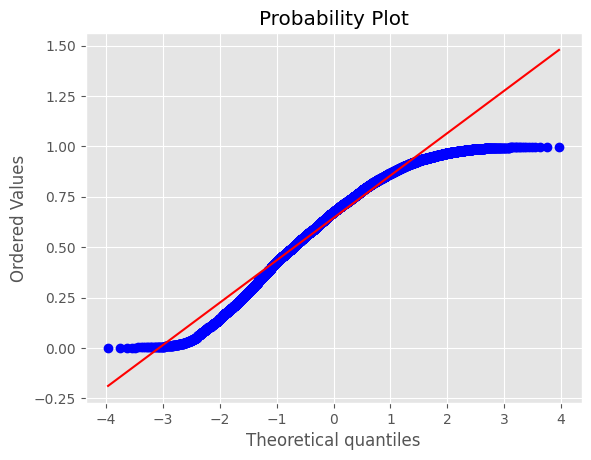

In [ ]:
col_list = []
for i in range(len(compe)):
    col_list.append(compe.iloc[i, 0])
    
stats.probplot(col_list, dist="norm", plot=plt)

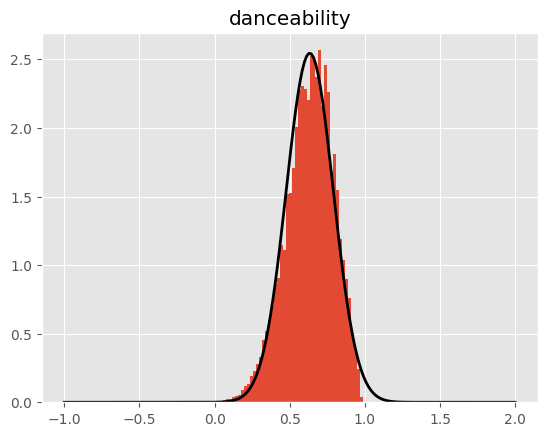

In [ ]:
comp = pd.DataFrame(data, columns=['danceability'])
comp.dropna()
compe.hist(bins = 50, density=True)

xs = np.linspace(-1, 2, 200)
ys = stats.norm(loc=comp.mean(), scale = comp.std(ddof=3)).pdf(xs)
plt.plot(xs, ys, color = 'black', lw=2);

((array([-3.96433549, -3.74743334, -3.62871405, ...,  3.62871405,
          3.74743334,  3.96433549]),
  array([0.    , 0.    , 0.0594, ..., 0.98  , 0.981 , 0.987 ])),
 (0.15586276966256568, 0.6333480700822937, 0.9943388178088507))

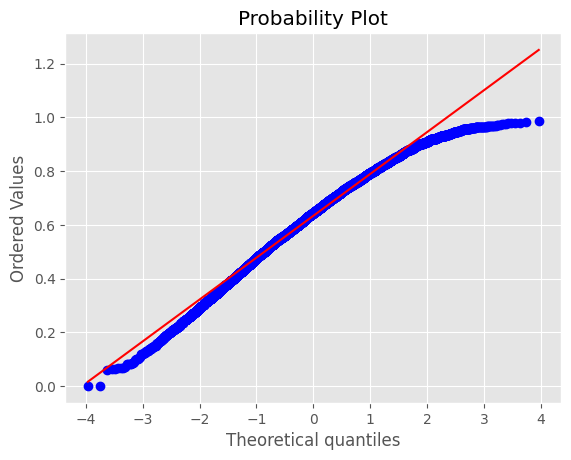

In [ ]:
col_list = []
for i in range(len(comp)):
    col_list.append(comp.iloc[i, 0])
    
stats.probplot(col_list, dist="norm", plot=plt)

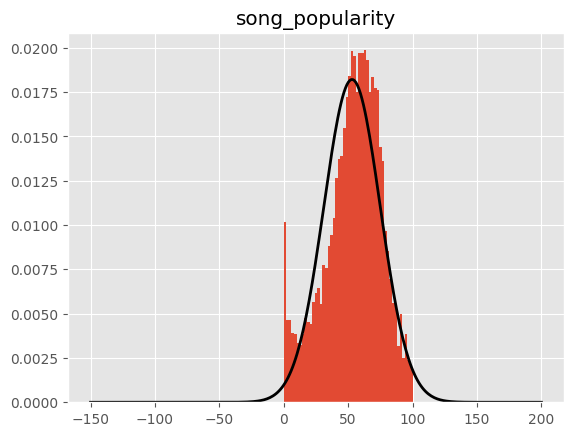

In [ ]:
comp = pd.DataFrame(data, columns=['song_popularity'])
comp.dropna()
comp.hist(bins = 50, density=True)

xs = np.linspace(-150, 200, 300)
ys = stats.norm(loc=comp.mean(), scale = comp.std(ddof=3)).pdf(xs)
plt.plot(xs, ys, color = 'black', lw=2);

((array([-3.96433549, -3.74743334, -3.62871405, ...,  3.62871405,
          3.74743334,  3.96433549]),
  array([  0,   0,   0, ..., 100, 100, 100])),
 (21.615933063196255, 52.991876825059734, 0.9866012932290195))

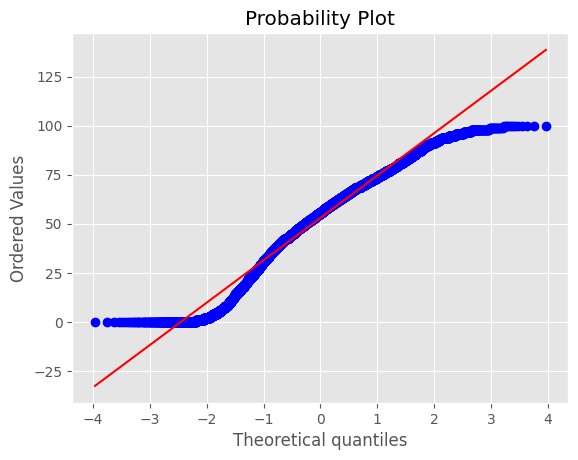

In [ ]:
col_list = []
for i in range(len(comp)):
    col_list.append(comp.iloc[i, 0])
    
stats.probplot(col_list, dist="norm", plot=plt)

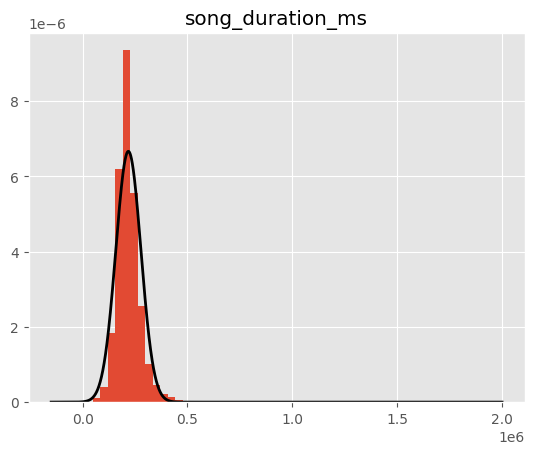

In [ ]:
comp = pd.DataFrame(data, columns=['song_duration_ms'])
comp.dropna()
comp.hist(bins = 50, density=True)

xs = np.linspace(-150000, 2000000, 30000)
ys = stats.norm(loc=comp.mean(), scale = comp.std(ddof=3)).pdf(xs)
plt.plot(xs, ys, color = 'black', lw=2);

((array([-3.96433549, -3.74743334, -3.62871405, ...,  3.62871405,
          3.74743334,  3.96433549]),
  array([  12000,   26186,   31373, ..., 1233666, 1355938, 1799346])),
 (55345.767990328306, 218211.58757632072, 0.9239997714433544))

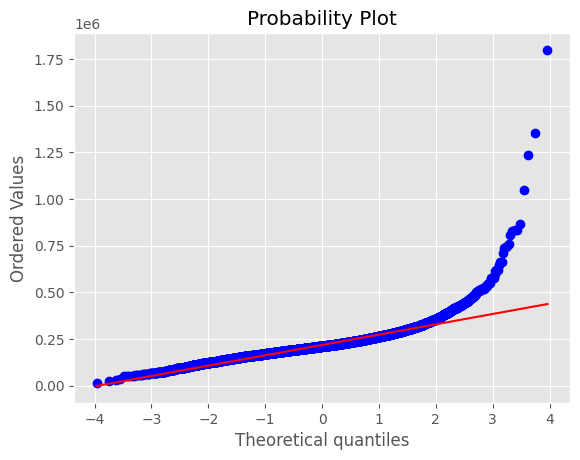

In [ ]:
col_list = []
for i in range(len(comp)):
    col_list.append(comp.iloc[i, 0])
    
stats.probplot(col_list, dist="norm", plot=plt)

In [ ]:
predictors = df[df.columns[~df.columns.isin(["song_popularity"])]].to_numpy()
output = df["song_popularity"]

opt_glob = opt.lsq_linear(predictors, output)
coef = opt_glob.x
coefs = coef
temp = np.matmul(predictors, coef) - output
err = np.matmul(temp.T, temp)

print("Приближенные методы")

print("о.н.к. вектора коэффициентов:")
for i in range(len(coef)):
    print("Коэффициент с номером", i, ":", coef[i])

print()
    
dataset_size = len(predictors)
predictors_size = len(predictors[0])
err_est = err / (dataset_size - predictors_size)
print("Оценка остаточной дисперсии:", err_est)


sse = sum((output - predictors @ coef) ** 2)
mean_y = np.mean(output)
sst = sum((output - mean_y) ** 2)
print("Коэффициент детерминации:", 1 - sse / sst)


Приближенные методы
о.н.к. вектора коэффициентов:
Коэффициент с номером 0 : 44.60966123617751
Коэффициент с номером 1 : 14.478199188987636
Коэффициент с номером 2 : -0.25671028361115034
Коэффициент с номером 3 : -2.850202154291992e-06

Оценка остаточной дисперсии: 474.68050520294605
Коэффициент детерминации: 0.010946570823364699


### Задание 2



In [ ]:
alphas = [0.1, 0.05, 0.01, 0.005, 0.001]

def accept_or_reject(p, alphas = alphas):
    print(f'p-value = {p}')
    for alpha in alphas:
        print(f'For alpha = {alpha} we ', end = '')
        if alpha > p:
            print('reject H0')
        else:
            print('accept H0')

features = ['danceability', 'energy', 'song_duration_ms']
target = 'Price'
bias = True
coef_mask = None
masking = Counter(coef_mask)[0]
mask = coef_mask

In [ ]:
def countT_stat(name):
  n, m = predictors.shape
  idx = features.index(name)
  coef = coefs[idx]
  num = coef
  A = predictors.T @ predictors
  invA = np.linalg.inv(A)
  S2 = err_est
  denum = (invA[idx][idx] * S2) ** 0.5
  T = num / denum
  p_value = 1 - stat.t.cdf(T, n - m)
  return T, p_value

Чем больше энергичность, тем больше популярность

In [ ]:
stat, p = countT_stat(name = 'energy')
accept_or_reject(p)

p-value = 0.634649645280988
For alpha = 0.1 we accept H0
For alpha = 0.05 we accept H0
For alpha = 0.01 we accept H0
For alpha = 0.005 we accept H0
For alpha = 0.001 we accept H0


Популярность зависит от продолжительности

In [ ]:
def countT2_stat(name, predictors, coefs, err_est):
    n, m = predictors.shape
    idx = features.index(name)
    coef = coefs[idx]
    num = coef
    A = predictors.T @ predictors
    invA = np.linalg.inv(A)
    S2 = err_est
    denum = (invA[idx][idx] * S2) ** 0.5
    T = num / denum
    p_value = stats.t.sf(np.abs(T), n - m) * 2
    return T, p_value

In [ ]:
stat, p = countT2_stat(name = 'song_duration_ms')
accept_or_reject(p)

p-value = 0.8563507932729206
For alpha = 0.1 we accept H0
For alpha = 0.05 we accept H0
For alpha = 0.01 we accept H0
For alpha = 0.005 we accept H0
For alpha = 0.001 we accept H0


Популярность зависит от энергичности и ”танцевальности”. Занулим продолжительность песен. Посмотрим на новую модель.

In [ ]:
df = pd.DataFrame(data, columns=['song_popularity', 'danceability', 'energy', 'song_duration_ms'])
df['danceability'] = 0
df['energy'] = 0
df.insert(1, "fict", np.array([1] * df.shape[0]))
df

,song_popularity,fict,danceability,energy,song_duration_ms
0,73,1,0,0,262333
1,66,1,0,0,216933
2,76,1,0,0,231733
3,74,1,0,0,216933
4,56,1,0,0,223826
...,...,...,...,...,...
18830,60,1,0,0,159645
18831,60,1,0,0,205666
18832,23,1,0,0,182211
18833,55,1,0,0,352280


In [ ]:
predictors2 = df[df.columns[~df.columns.isin(["song_popularity"])]].to_numpy()
output2 = df["song_popularity"]

opt_glob2 = opt.lsq_linear(predictors, output)
coef2 = opt_glob.x
coefs2 = coef
temp2 = np.matmul(predictors, coef) - output
err2 = np.matmul(temp.T, temp)

print("Приближенные методы")

print("о.н.к. вектора коэффициентов:")
for i in range(len(coef)):
    print("Коэффициент с номером", i, ":", coef2[i])

print()
    
dataset_size2 = len(predictors)
predictors_size2 = len(predictors[0])
err_est2 = err / (dataset_size - predictors_size)
print("Оценка остаточной дисперсии:", err_est2)


sse2 = sum((output2 - predictors2 @ coef2) ** 2)
mean_y2 = np.mean(output2)
sst2 = sum((output2 - mean_y2) ** 2)
print("Коэффициент детерминации:", 1 - sse2 / sst2)

Приближенные методы
о.н.к. вектора коэффициентов:
Коэффициент с номером 0 : 44.60966123617751
Коэффициент с номером 1 : 14.478199188987636
Коэффициент с номером 2 : -0.25671028361115034
Коэффициент с номером 3 : -2.850202154291992e-06

Оценка остаточной дисперсии: 474.68050520294605
Коэффициент детерминации: -0.1687313848203582


In [ ]:
#F-test
F = (err2 - err) / err
n, m = predictors.shape
F *= (n - m) / 2
p_value = 1 - stat.f.cdf(F, masking, n - m)
accept_or_reject(p_value)

p-value = nan
For alpha = 0.1 we accept H0
For alpha = 0.05 we accept H0
For alpha = 0.01 we accept H0
For alpha = 0.005 we accept H0
For alpha = 0.001 we accept H0
